# 데이터사이언스 (0010085001)

## Exercise 11: Linear Classification

In this excercise, we will implement the pocket algorithm for the binary classification.

In [1]:
import numpy as np

%matplotlib inline
import sklearn.datasets
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# 1. 데이터 생성
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

np.random.seed(0)

X, y = sklearn.datasets.make_moons(200, noise=0.1)

# 데이터 크기 및 샘플 확인
print(X[:5])
print(y[:5])
print(X.shape, y.shape)

[[ 0.79235735  0.50264857]
 [ 1.63158315 -0.4638967 ]
 [-0.06710927  0.26776706]
 [-1.04412427 -0.18260761]
 [ 1.76704822 -0.19860987]]
[0 1 1 0 1]
(200, 2) (200,)


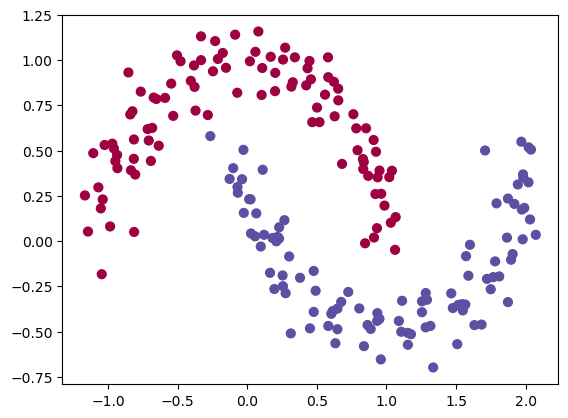

In [3]:
# 2. 데이터 시각화
plt.scatter(X[:, 0], X[:,1], 
            s=40, 
            c=y,
            cmap=plt.cm.Spectral)

In [22]:
# 3. bias 설정

# [x1, x2] -> [x0, x1, x2], x0=1 (bias)

# X 의 모든 데이터에 bias 로 활용될, x_0 = 1 을 추가
oneVector = np.ones((X.shape[0], 1))
print(oneVector.shape)

# 기존에 x_1, x_2만 존재하는 X 에 x_0 을 붙임
X_train = np.concatenate((oneVector, X), axis=1)
print(X_train.shape)
print(X_train[:5])

(200, 1)
(200, 3)
[[ 1.          0.79235735  0.50264857]
 [ 1.          1.63158315 -0.4638967 ]
 [ 1.         -0.06710927  0.26776706]
 [ 1.         -1.04412427 -0.18260761]
 [ 1.          1.76704822 -0.19860987]]


In [23]:
# 4. 파라미터 설정

# w(t+1) <- w(t) + learning_rate*y(t)*x(t)


# 학습률 (learning rate) 설정
# -> 각 iteration 에서 가중치의 갱신 정도를 결정
learningRate = 0.01

# 파라미터 (parameter) 또는 가중치 (weights) 설정
# -> [w_0, w_1, w_2] 을 의미
weights = np.random.rand(3, 1) 

# 최대 오분류 샘플 수 설정
# -> pocket algorithm 에서는 모든 데이터에 대해 평가 (evaluation) 수행
# -> 얼마나 좋은 가중치 (weights) 인지 확인
minMisclassifications = 10000

# 반복 (iteration, T) 횟수 초기화
numIteration = 1000

In [24]:
# 5. pocket 알고리즘 학습

# 최적의 가중치를 저장할 변수 설정
best_weights = np.zeros((3, 1))

for iteration in range(numIteration):
    iteration += 1
    
    misClassifications = 0

    for i in range(0, len(X_train)):
        # 전체 데이터에서 하나씩 읽어옴
        currentX = X_train[i].reshape(-1, X_train.shape[1]) # (3,) -> (1, 3)
        currentY = y[i]

        # w^Tx -> (1, 3) * (3, 1) -> scalar

        # 각 데이터에 대해 w^T x 연산 수행
        wTx = np.dot(currentX, weights)[0][0]
      
        # y_true (f) = [1, 0, 1, 0, 0, 1, 0, 0, ...] (200개)
        # y_pred (h) = [1, 1, 0, 0, 1, 0, 1, 1, ...] (200개)
        # e.g. 
        # 1st data
        # currentY == 1 and wTx > 0 => 올바르게 분류 (else)

        # 2nd data
        # currentY == 0 and wTx > 0 => 잘못분류 (elif 문)

        # 3rd data
        # currentY == 1 and wTx < 0 => 잘못분류 (if 문)

        # 4th data
        # currentY = 0 and wTx < 0 => 올바르게 분류 (else)


        # PLA 알고리즘과 동일
        # -> 오분류의 기준이 퍼셉트론 (perceptron) 과 동일
        # -> 차이가 있다면 가중치 (learning rate) 가 입력에 곱해지는 것
        if currentY == 1 and wTx < 0: # [h(x)=-1 \neq f(x)=1]
            misClassifications += 1

            # w(t+1) <- w(t) + learning_rate * y(t) * x(t)
            weights = weights + learningRate * np.transpose(currentX)

        elif currentY == 0 and wTx > 0:
            misClassifications += 1
            weights = weights - learningRate * np.transpose(currentX)
    
        # else:
        #   print('잘 분류된 경우')

        if i % 10 == 0:
          plot_hyperplane(X, y, weights)
          # save...

    # 최적의 가중치 확인 및 저장
    if misClassifications < minMisclassifications:
        minMisclassifications = misClassifications
        
        print('Keep best weights: {}'.format(minMisclassifications))
        best_weights = weights
    
    if iteration % 100 == 0:
        print("Iteration {}, Misclassifications {}".format(iteration, misClassifications))

Keep best weights: 104
Keep best weights: 85
Keep best weights: 43
Keep best weights: 39
Keep best weights: 38
Keep best weights: 37
Keep best weights: 36
Keep best weights: 34
Keep best weights: 33
Keep best weights: 28
Iteration 100, Misclassifications 34
Iteration 200, Misclassifications 38
Iteration 300, Misclassifications 37
Iteration 400, Misclassifications 34
Iteration 500, Misclassifications 37
Iteration 600, Misclassifications 33
Iteration 700, Misclassifications 44
Iteration 800, Misclassifications 38
Iteration 900, Misclassifications 38
Iteration 1000, Misclassifications 35


In [25]:
# 6. 학습 결과 확인

# 우리는 이전 셀 학습에서 minMisclassifications 에 가장 적게 틀린
print("Minimum Misclassifications : {}".format(minMisclassifications) )

print('Final weight is: {}'.format(weights.transpose()) )

print('Best weight is: {}'.format(best_weights.transpose()) )

# accuracy: (전체 데이터 수 - 틀린 데이터 수) / 전체 데이터 수
accuracy = ((X_train.shape[0] - minMisclassifications) / X_train.shape[0])

print("Best Accuracy of PocketAlgorithm is: {}".format(accuracy))

Minimum Misclassifications : 28
Final weight is: [[ 0.00499445  0.01149508 -0.02677162]]
Best weight is: [[ 0.00499445  0.00155241 -0.02405359]]
Best Accuracy of PocketAlgorithm is: 0.86


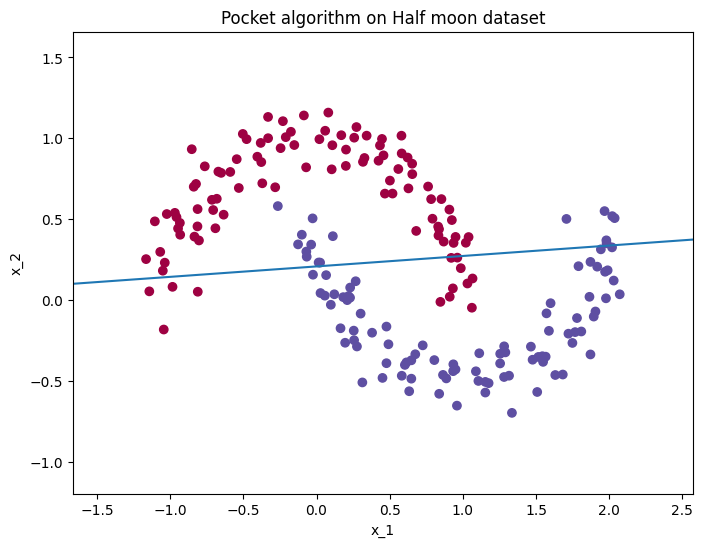

In [26]:
# 7. 학습 결과 시각화

# 그려질 그래프의 두 축의 최대, 최소값 설정
max_x = np.max(X[:, 0])
min_x = np.min(X[:, 0])

max_y = np.max(X[:, 1])
min_y = np.min(X[:, 1])

def plot_hyperplane(X, Y, weights):
    
    # w2*x2 + w1*x1 + w0*x0 = 0 
    # x2 = - (w1/w2)*x1 - (w0/w2)*x0
    
    # line 의 기울기 및 절편 계산
    slope = -weights[1] / weights[2]
    intercept = -weights[0] / weights[2]

    # line 생성
    x_hyperplane = np.linspace(-2, 3, 10)
    y_hyperplane = slope * x_hyperplane + intercept
    
    # 그래프 그리기
    plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Spectral)

    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.title("Pocket algorithm on Half moon dataset")
    plt.xlabel("x_1")
    plt.ylabel("x_2")

    plt.xlim((min_x - 0.5, max_x + 0.5))
    plt.ylim((min_y - 0.5, max_y + 0.5))
    
    plt.show()

# Final weights 로 line 그리기    
# plot_hyperplane(X, y, weights)

# Best weights 로 line 그리기
plot_hyperplane(X, y, best_weights)